In [3]:
import numpy as np
import sympy as sp
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import odeint

---
### 境界層(boundary layer)

**排除厚さ (displacement thickness)**$$
\delta^* = \frac{1}{U}\int_0^\infty (U-u)dy \tag{1}
$$

**運動量厚さ (momentum thickness)**$$
\theta = \frac{1}{U^2}\int_0^\infty u(U-u)dy \tag{2}
$$

**エネルギー厚さ (energy thickness)**$$
\theta^* = \frac{1}{U^3}\int_0^\infty u(U^2-u^2)dy \tag{3}
$$

**形状係数 (shape factor)**$$
H = \frac{\delta^*}{\theta} \tag{4}
$$

U : 主流流速  
y : 物体表面からの垂直距離  
u : 境界層内の速度分布  

---

---

### Case1
境界層内の速度分布が次式で与えられる場合の形状係数Hを求める。
$$
u = U \left( \frac{y}{\delta} \right) ^{\frac{1}{2}}
$$

---

計算上では、積分範囲は y : (0 → δ(境界層の外端)) として行う。

In [81]:
sp.init_printing()

# 変数を定義
y, U, delta = sp.symbols('y U delta')

# 速度関数 u(y) の定義
u = sp.Function("u")
u = U * (y / delta)**(1/2)

print(u)
sp.cancel(u)

U*(y/delta)**0.5


In [82]:
# 排除厚さ delta_star(y) を定義
delta_star = sp.Function("delta_star")
delta_star = (1 / U) * sp.integrate(( U - u ), (y, 0, delta))

print(delta_star)
sp.cancel(delta_star)

0.333333333333333*delta


In [83]:
# 運動量厚さ theta(y) を定義
theta = sp.Function("theta")
theta = (1 / U**2) * sp.integrate( u * ( U - u ), (y, 0, delta) )

print(theta)
sp.cancel(theta)

(0.666666666666667*U*delta**1.5*(1/delta)**0.5 - 0.5*U*delta**2.0*(1/delta)**1.0)/U


0.333333333333333*U*delta/(0.666666666666667*U*delta**1.5*(1/delta)**0.5 - 0.5*U*delta**2.0*(1/delta)**1.0)


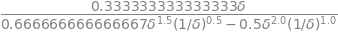

In [86]:
# 形状係数 H を定義
H = sp.Function("H")
H = delta_star / theta

print(H)
sp.cancel(H)

In [74]:
(0.333308291509631 / (0.656691708490369 - 0.49005))*delta

---
Ans. $$H=2\delta$$

---